In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl


In [2]:
LISAM=pd.read_csv('listings_amsterdam.csv')
LISPOR=pd.read_csv('listings_porto.csv')

AMSTERDAM

In [3]:
LISAM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9310 entries, 0 to 9309
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              9310 non-null   int64  
 1   name                            9310 non-null   object 
 2   host_id                         9310 non-null   int64  
 3   host_name                       9310 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   9310 non-null   object 
 6   latitude                        9310 non-null   float64
 7   longitude                       9310 non-null   float64
 8   room_type                       9310 non-null   object 
 9   price                           5903 non-null   float64
 10  minimum_nights                  9310 non-null   int64  
 11  number_of_reviews               9310 non-null   int64  
 12  last_review                     83

In [156]:
freq_tbl(LISAM)

                                                name  frequency  percentage  \
0                             Apartment in Amsterdam         14    0.001504   
1                           Appartement in Amsterdam         10    0.001074   
2                        Cozy apartment in Amsterdam          9    0.000967   
3                      Lovely apartment in Amsterdam          8    0.000859   
4                        Cosy apartment in Amsterdam          6    0.000644   
...                                              ...        ...         ...   
9108       Elegant and spacious home on Amstel River          1    0.000107   
9109          Red Tulip Studio in Heart of Amsterdam          1    0.000107   
9110  Wonderful, beautiful and quiet place, welcome!          1    0.000107   
9111            Green oases in the city of Amsterdam          1    0.000107   
9112                            Beautiful town house          1    0.000107   

      cumulative_perc  
0            0.001504  
1  

In [157]:
#valores nulos
valores_nulos=LISAM.isnull().sum()
valores_nulos

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               9310
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             3407
minimum_nights                       0
number_of_reviews                    0
last_review                        992
reviews_per_month                  992
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                             97
dtype: int64

In [158]:
#dataframe con "bfill y "ffill"
LISAMclean =LISAM.fillna(method="ffill") 
LISAMclean =LISAMclean.fillna(method="bfill") 

/var/folders/19/7c2smbhs6b3g5ffy1ph3r__m0000gn/T/ipykernel_547/4020543599.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  LISAMclean =LISAM.fillna(method="ffill")
/var/folders/19/7c2smbhs6b3g5ffy1ph3r__m0000gn/T/ipykernel_547/4020543599.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  LISAMclean =LISAMclean.fillna(method="bfill")


In [159]:
#Quitamos la columna de neighbourhood_group ya que toda la columna carece de datos.
LISAMclean= LISAMclean.drop(columns=['neighbourhood_group'])
print(LISAMclean)


                       id                                               name  \
0                  306852         SunShine, A Sunny Amsterdam Center Special   
1                  307497                  Historical sailing ship Amsterdam   
2                  307621                 SunBird, Sunny Apt in Quiet Street   
3                  308028                             SunFlower, A Sunny B&B   
4                  311124  *historic centre* *bright* *canal view* *jordaan*   
...                   ...                                                ...   
9305  1175116824303726032                   bright & cozy space next to park   
9306  1175204029544779164                     Modern appartement in Oud-West   
9307  1175209350067731162                             1BA in amsterdam noord   
9308  1175238277305794588                     Canal view flat (roof terrace)   
9309  1175295633724170719                               Beautiful town house   

        host_id         host_name      

In [160]:
#check de valores nulos del dataframe
ValN=LISAMclean.isnull().sum()
ValN

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
dtype: int64

In [161]:
#Elminación de Outliers
#Columnas Cuantitativas
cuanti=LISAMclean.iloc[:,[8,9,10,12,13,14,15]]
cuanti

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,200.0,4,32,0.22,3,0,0
1,200.0,2,103,0.72,2,274,4
2,155.0,3,6,0.04,3,0,0
3,155.0,3,36,0.29,3,0,0
4,155.0,5,93,0.63,1,326,5
...,...,...,...,...,...,...,...
9305,120.0,1,0,1.00,1,161,0
9306,310.0,1,0,1.00,1,30,0
9307,180.0,3,0,1.00,1,16,0
9308,280.0,3,0,1.00,1,43,0


In [ ]:
#Columnas cualtitativas
cuali=LISAMclean.iloc[:,[0,1,2,3,4,5,6,7,11,16]]
cuali

<Figure size 1500x800 with 0 Axes>

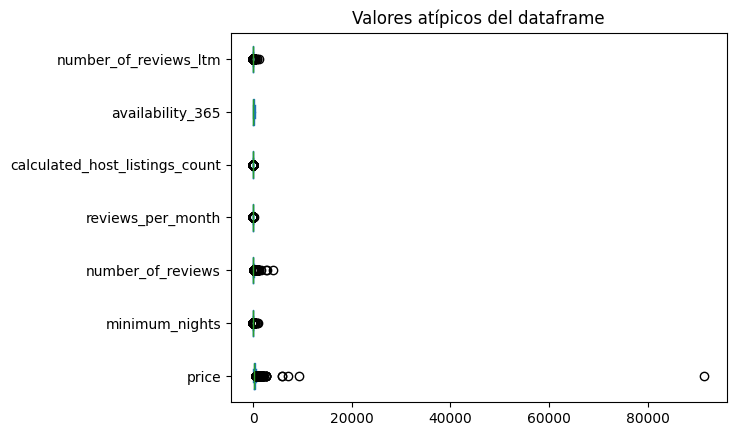

In [162]:
fig=plt.figure(figsize=(15,8))
cuanti.plot(kind='box',vert=False)
plt.title("Valores atípicos del dataframe")
plt.show() #Dibujamos el Diagrama

In [163]:
cuanti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9310 entries, 0 to 9309
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           9310 non-null   float64
 1   minimum_nights                  9310 non-null   int64  
 2   number_of_reviews               9310 non-null   int64  
 3   reviews_per_month               9310 non-null   float64
 4   calculated_host_listings_count  9310 non-null   int64  
 5   availability_365                9310 non-null   int64  
 6   number_of_reviews_ltm           9310 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 509.3 KB


In [164]:
y=cuanti
ls=y.mean() + 3*y.std()
li=y.mean() - 3*y.std()
print("Límite Superior Permitido", ls)
print("Límite Inferior Permitido", li)

Límite Superior Permitido price                             3201.865464
minimum_nights                      62.703219
number_of_reviews                  396.011291
reviews_per_month                    7.408969
calculated_host_listings_count       9.901680
availability_365                   406.337031
number_of_reviews_ltm               90.526038
dtype: float64
Límite Inferior Permitido price                            -2634.257731
minimum_nights                     -54.172177
number_of_reviews                 -304.628906
reviews_per_month                   -5.238679
calculated_host_listings_count      -6.342926
availability_365                  -241.112971
number_of_reviews_ltm              -70.980174
dtype: float64


In [165]:
LAC2=cuanti[(y<=ls)&(y>=li)]
LAC2

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,200.0,4.0,32.0,0.22,3.0,0,0.0
1,200.0,2.0,103.0,0.72,2.0,274,4.0
2,155.0,3.0,6.0,0.04,3.0,0,0.0
3,155.0,3.0,36.0,0.29,3.0,0,0.0
4,155.0,5.0,93.0,0.63,1.0,326,5.0
...,...,...,...,...,...,...,...
9305,120.0,1.0,0.0,1.00,1.0,161,0.0
9306,310.0,1.0,0.0,1.00,1.0,30,0.0
9307,180.0,3.0,0.0,1.00,1.0,16,0.0
9308,280.0,3.0,0.0,1.00,1.0,43,0.0


In [166]:
vn=LAC2.isnull().sum()
vn

price                               5
minimum_nights                     41
number_of_reviews                 205
reviews_per_month                  79
calculated_host_listings_count    194
availability_365                    0
number_of_reviews_ltm              80
dtype: int64

In [167]:
datac=LAC2.copy()
datac=LAC2.fillna(round(LAC2.mean(),1))
datac

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,200.0,4.0,32.0,0.22,3.0,0,0.0
1,200.0,2.0,103.0,0.72,2.0,274,4.0
2,155.0,3.0,6.0,0.04,3.0,0,0.0
3,155.0,3.0,36.0,0.29,3.0,0,0.0
4,155.0,5.0,93.0,0.63,1.0,326,5.0
...,...,...,...,...,...,...,...
9305,120.0,1.0,0.0,1.00,1.0,161,0.0
9306,310.0,1.0,0.0,1.00,1.0,30,0.0
9307,180.0,3.0,0.0,1.00,1.0,16,0.0
9308,280.0,3.0,0.0,1.00,1.0,43,0.0


In [168]:
vn=datac.isnull().sum()
vn

price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [169]:
DLA = pd.concat([datac, cuali], axis=1)
DLA

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,last_review,license
0,200.0,4.0,32.0,0.22,3.0,0.0,0.0,Beach & Walkways GuestHouse,364782402,Sara,VILA DO CONDE,Árvore,41.331450,-8.736640,Entire home/apt,2024-05-30,111682/AL
1,200.0,2.0,103.0,0.72,2.0,274.0,4.0,Estúdio Canidelo,507933510,Dias,VILA NOVA DE GAIA,Canidelo,41.115440,-8.658380,Entire home/apt,2023-08-20,09664976
2,155.0,3.0,6.0,0.04,3.0,0.0,0.0,Estudio centro do Porto,353219224,Porto Automatic,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.148350,-8.609070,Entire home/apt,2024-05-16,105205/AL
3,155.0,3.0,36.0,0.29,3.0,0.0,0.0,Luz&Martins Alojamento,581453724,Daniela,PAREDES,Aguiar de Sousa,41.134845,-8.419740,Entire home/apt,2024-05-16,156744
4,155.0,5.0,93.0,0.63,1.0,326.0,5.0,Cama 5 em Dormitório Feminino,513540563,Hostel,VILA DO CONDE,Gião,41.302684,-8.682174,Shared room,2024-05-16,144145/AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oliveira's Guest house,208070191,Alberto,SANTA MARIA DA FEIRA,"Lobão, Gião, Louredo e Guisande",40.985294,-8.463863,Entire home/apt,2024-06-16,156219/AL
14247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Quarto luminoso, varanda privada",25730586,Bruno,VILA NOVA DE GAIA,Arcozelo,41.049510,-8.649560,Private room,2023-06-05,100685/AL
14248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Village Guest House - Family House,459462360,Sandra,AROUCA,Arouca e Burgo,40.933365,-8.243763,Entire home/apt,2024-06-02,122687/AL
14249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa do TanqueT1-Vila de Arouca,171473966,Mané Röseler E Pedro Röseler,AROUCA,Arouca e Burgo,40.931110,-8.245820,Entire home/apt,2024-06-11,63323/AL


In [170]:
vn=DLA.isnull().sum()
vn

price                             4941
minimum_nights                    4941
number_of_reviews                 4941
reviews_per_month                 4941
calculated_host_listings_count    4941
availability_365                  4941
number_of_reviews_ltm             4941
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
last_review                          0
license                              0
dtype: int64

In [171]:
#Procedemos con la base de Porto
LISPOR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14251 entries, 0 to 14250
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14251 non-null  int64  
 1   name                            14251 non-null  object 
 2   host_id                         14251 non-null  int64  
 3   host_name                       14251 non-null  object 
 4   neighbourhood_group             14251 non-null  object 
 5   neighbourhood                   14251 non-null  object 
 6   latitude                        14251 non-null  float64
 7   longitude                       14251 non-null  float64
 8   room_type                       14251 non-null  object 
 9   price                           12778 non-null  float64
 10  minimum_nights                  14251 non-null  int64  
 11  number_of_reviews               14251 non-null  int64  
 12  last_review                     

In [30]:
freq_tbl(LISPOR)

                                                    name  frequency  \
0                                        Casa de Cristal          8   
1                      Asgard Oporto Downtown Apartments          7   
2              Cama em casa com piscina em frente ao mar          6   
3                                    Owls Hostel Ribeiro          6   
4                            AVUS M Apartment by DA'Home          6   
...                                                  ...        ...   
13969     Modern Apartment in Downtown Porto with garden          1   
13970                                   Casa Delfim Doze          1   
13971                    GuestReady - Road to Revolution          1   
13972  Oporto Home Wine Cellars - Estúdio c/ Terraço ...          1   
13973  PERFECTION❤️Penthouse w/ 180° Panoramic Ocean ...          1   

       percentage  cumulative_perc  
0        0.000561         0.000561  
1        0.000491         0.001053  
2        0.000421         0.001474  

In [31]:
#Identificamos valores nulos 
vn=LISPOR.isnull().sum()
vn

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             1473
minimum_nights                       0
number_of_reviews                    0
last_review                       1699
reviews_per_month                 1699
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                            815
dtype: int64

In [ ]:
LISPOR.head()

In [ ]:
LPC=LISPOR.fillna(method="ffill")
vn=LPC.isnull().sum()
vn

In [ ]:
LPC.info()

In [ ]:
#Ahora identificamos los outliers de Porto
#Columnas Cuantitativas
cuantiP=LPC.iloc[:,[9,10,11,13,14,15,16]]
cuantiP

In [53]:
cualiP=LPC.iloc[:,[1,2,3,4,5,6,7,8,12,17]]
cualiP

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,last_review,license
0,Beach & Walkways GuestHouse,364782402,Sara,VILA DO CONDE,Árvore,41.331450,-8.736640,Entire home/apt,2024-05-30,111682/AL
1,Estúdio Canidelo,507933510,Dias,VILA NOVA DE GAIA,Canidelo,41.115440,-8.658380,Entire home/apt,2023-08-20,09664976
2,Estudio centro do Porto,353219224,Porto Automatic,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.148350,-8.609070,Entire home/apt,2024-05-16,105205/AL
3,Luz&Martins Alojamento,581453724,Daniela,PAREDES,Aguiar de Sousa,41.134845,-8.419740,Entire home/apt,2024-05-16,156744
4,Cama 5 em Dormitório Feminino,513540563,Hostel,VILA DO CONDE,Gião,41.302684,-8.682174,Shared room,2024-05-16,144145/AL
...,...,...,...,...,...,...,...,...,...,...
14246,Oliveira's Guest house,208070191,Alberto,SANTA MARIA DA FEIRA,"Lobão, Gião, Louredo e Guisande",40.985294,-8.463863,Entire home/apt,2024-06-16,156219/AL
14247,"Quarto luminoso, varanda privada",25730586,Bruno,VILA NOVA DE GAIA,Arcozelo,41.049510,-8.649560,Private room,2023-06-05,100685/AL
14248,Village Guest House - Family House,459462360,Sandra,AROUCA,Arouca e Burgo,40.933365,-8.243763,Entire home/apt,2024-06-02,122687/AL
14249,Casa do TanqueT1-Vila de Arouca,171473966,Mané Röseler E Pedro Röseler,AROUCA,Arouca e Burgo,40.931110,-8.245820,Entire home/apt,2024-06-11,63323/AL


In [ ]:
fig=plt.figure(figsize=(15,8))
cuantiP.plot(kind='box',vert=False)
plt.title("Valores atípicos del dataframe")
plt.show() #Dibujamos el diagrama

In [ ]:
y=cuantiP
ls=y.mean() + 3*y.std()
li=y.mean() - 3*y.std()
print("Límite Superior Permitido", ls)
print("Límite Inferior Permitido", li)

In [ ]:
LPC2=cuantiP[(y<=ls)&(y>=li)]
LPC2

In [45]:
vn=LPC2.isnull().sum()
vn

price                              64
minimum_nights                     41
number_of_reviews                 314
reviews_per_month                 159
calculated_host_listings_count    307
availability_365                    0
number_of_reviews_ltm             229
dtype: int64

In [58]:
dataPc=LPC2.copy()
dataPc=LPC2.fillna(round(LPC2.mean(),1))
dataPc

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,100.0,2.0,39.0,0.85,1.0,56,7.0
1,100.0,3.0,2.0,0.18,1.0,358,2.0
2,86.0,1.0,121.0,2.59,8.0,344,19.0
3,165.0,2.0,0.0,2.59,1.0,236,0.0
4,23.0,1.0,0.0,2.59,21.0,365,0.0
...,...,...,...,...,...,...,...
14246,52.0,3.0,1.0,1.00,1.0,340,1.0
14247,35.0,1.0,6.0,0.28,4.0,150,0.0
14248,87.0,1.0,47.0,1.90,2.0,333,22.0
14249,69.0,1.0,149.0,1.99,4.0,292,24.0


In [ ]:
vn=dataPc.isnull().sum()
vn

In [59]:
# Unimos la columna 'cuantitativas' con el dataframe
Datos_limpios_Porto = pd.concat([dataPc, cualiP], axis=1)
Datos_limpios_Porto

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,last_review,license
0,100.0,2.0,39.0,0.85,1.0,56,7.0,Beach & Walkways GuestHouse,364782402,Sara,VILA DO CONDE,Árvore,41.331450,-8.736640,Entire home/apt,2024-05-30,111682/AL
1,100.0,3.0,2.0,0.18,1.0,358,2.0,Estúdio Canidelo,507933510,Dias,VILA NOVA DE GAIA,Canidelo,41.115440,-8.658380,Entire home/apt,2023-08-20,09664976
2,86.0,1.0,121.0,2.59,8.0,344,19.0,Estudio centro do Porto,353219224,Porto Automatic,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.148350,-8.609070,Entire home/apt,2024-05-16,105205/AL
3,165.0,2.0,0.0,2.59,1.0,236,0.0,Luz&Martins Alojamento,581453724,Daniela,PAREDES,Aguiar de Sousa,41.134845,-8.419740,Entire home/apt,2024-05-16,156744
4,23.0,1.0,0.0,2.59,21.0,365,0.0,Cama 5 em Dormitório Feminino,513540563,Hostel,VILA DO CONDE,Gião,41.302684,-8.682174,Shared room,2024-05-16,144145/AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14246,52.0,3.0,1.0,1.00,1.0,340,1.0,Oliveira's Guest house,208070191,Alberto,SANTA MARIA DA FEIRA,"Lobão, Gião, Louredo e Guisande",40.985294,-8.463863,Entire home/apt,2024-06-16,156219/AL
14247,35.0,1.0,6.0,0.28,4.0,150,0.0,"Quarto luminoso, varanda privada",25730586,Bruno,VILA NOVA DE GAIA,Arcozelo,41.049510,-8.649560,Private room,2023-06-05,100685/AL
14248,87.0,1.0,47.0,1.90,2.0,333,22.0,Village Guest House - Family House,459462360,Sandra,AROUCA,Arouca e Burgo,40.933365,-8.243763,Entire home/apt,2024-06-02,122687/AL
14249,69.0,1.0,149.0,1.99,4.0,292,24.0,Casa do TanqueT1-Vila de Arouca,171473966,Mané Röseler E Pedro Röseler,AROUCA,Arouca e Burgo,40.931110,-8.245820,Entire home/apt,2024-06-11,63323/AL


In [ ]:
vn=Datos_limpios_Porto.isnull().sum()
vn

In [60]:
Datos_limpios_Porto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14251 entries, 0 to 14250
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           14251 non-null  float64
 1   minimum_nights                  14251 non-null  float64
 2   number_of_reviews               14251 non-null  float64
 3   reviews_per_month               14251 non-null  float64
 4   calculated_host_listings_count  14251 non-null  float64
 5   availability_365                14251 non-null  int64  
 6   number_of_reviews_ltm           14251 non-null  float64
 7   name                            14251 non-null  object 
 8   host_id                         14251 non-null  int64  
 9   host_name                       14251 non-null  object 
 10  neighbourhood_group             14251 non-null  object 
 11  neighbourhood                   14251 non-null  object 
 12  latitude                        

***Procedemos a Graficar***

Price Porto

In [84]:
table=freq_tbl(Datos_limpios_Porto['price'].astype(str))
table
filtroP=table[table['frequency']>143]
filtroP
filtro_indexP=filtroP.set_index('price')
filtro_indexP
filtro_index_frequencyP=filtro_indexP.drop(['percentage','cumulative_perc'],axis=1)
filtro_index_frequencyP


,frequency
price,
70.0,321
80.0,315
100.0,297
75.0,255
90.0,242
85.0,234
60.0,226
65.0,214
120.0,183


<Axes: xlabel='price'>

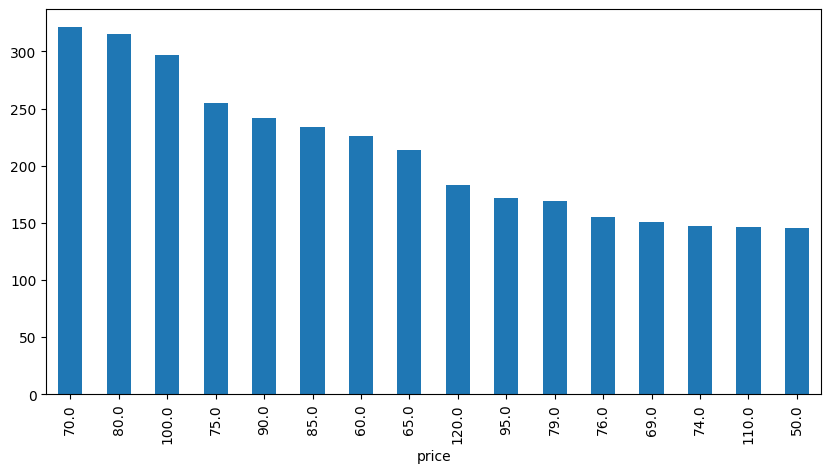

In [85]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index_frequencyP["frequency"].plot(kind='bar', figsize=(10,5))

Price Amsterdam

In [81]:
table2=freq_tbl(DLA['price'].astype(str))
table2
filtro2=table2[table2['frequency']>100]
filtro2
filtro_index=filtro2.set_index('price')
filtro_index
filtro_index_frequency=filtro_index.drop(['percentage','cumulative_perc'],axis=1)
filtro_index_frequency

,frequency
price,
250.0,348
200.0,324
300.0,311
350.0,237
400.0,173
150.0,148
175.0,145
225.0,130
180.0,124


<Axes: xlabel='price'>

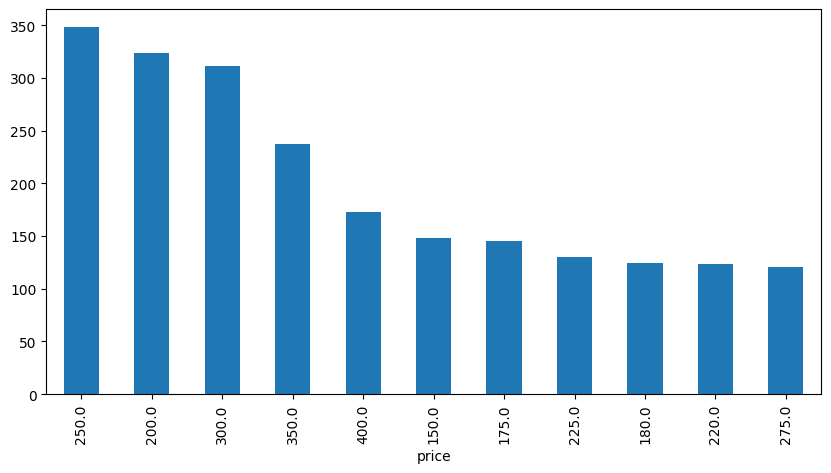

In [82]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index_frequency["frequency"].plot(kind='bar', figsize=(10,5))

Name

In [73]:
#Amsterdam
table1= freq_tbl(DLA['name'])
table1
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>4]
Filtro
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('name')
Filtro_index
#Elimino las columnas de "percentage" y "cumulative_perc"

Filtro_index_frequency= Filtro_index.drop(['percentage','cumulative_perc'], axis=1)
Filtro_index_frequency


,frequency
name,
Apartment in Amsterdam,14
Appartement in Amsterdam,10
Cozy apartment in Amsterdam,9
Lovely apartment in Amsterdam,8
Cosy apartment in Amsterdam,6
Cozy apartment in Amsterdam West,6
Spacious apartment in Amsterdam,6
Spacious & convenient stay in Amsterdam South,5
"Dubbel kamer, ontbijt is inbegrepen.",5


Text(0, 0.5, 'Frecuencia')

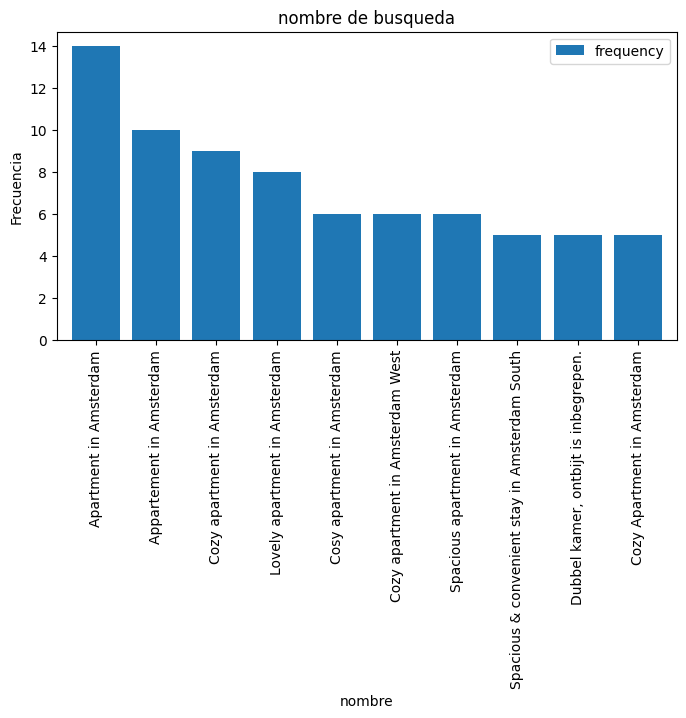

In [74]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index_frequency.plot(kind = 'bar', width=0.8, figsize=(8,4))
plt.title('nombre de busqueda')
plt.xlabel('nombre')
plt.ylabel('Frecuencia')

In [76]:
#Porto
table3= freq_tbl(Datos_limpios_Porto['name'])
table3
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro4= table3[table3['frequency']>4]
Filtro4
#Ajusto el indice de mi dataframe
Filtro_index2= Filtro4.set_index('name')
Filtro_index2
#Elimino las columnas de "percentage" y "cumulative_perc"

Filtro_index_frequency= Filtro_index2.drop(['percentage','cumulative_perc'], axis=1)
Filtro_index_frequency

,frequency
name,
Casa de Cristal,8
Asgard Oporto Downtown Apartments,7
Cama em casa com piscina em frente ao mar,6
Owls Hostel Ribeiro,6
AVUS M Apartment by DA'Home,6
Pensão Favorita,6
Quarto Duplo,6
A Friendly Space center of Porto,6
☆ Burgos 21: Private Suite with Free Parking ☆,6


Text(0, 0.5, 'Frecuencia')

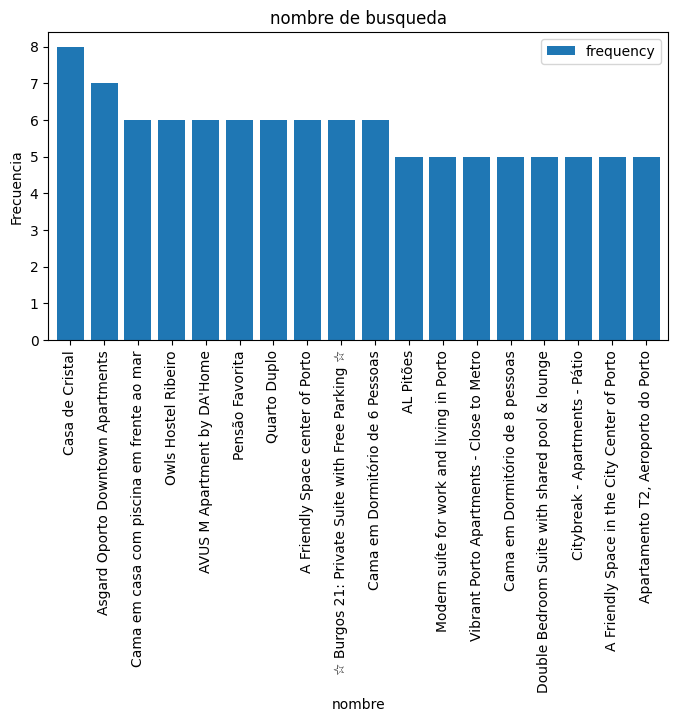

In [77]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index_frequency.plot(kind = 'bar', width=0.8, figsize=(8,4))
plt.title('nombre de busqueda')
plt.xlabel('nombre')
plt.ylabel('Frecuencia')

Minimum Nights

In [86]:
#Amsterdam
table2=freq_tbl(DLA['minimum_nights'].astype(str))
table2
filtro2=table2[table2['frequency']>100]
filtro2
filtro_index=filtro2.set_index('minimum_nights')
filtro_index
filtro_index_frequency=filtro_index.drop(['percentage','cumulative_perc'],axis=1)
filtro_index_frequency

,frequency
minimum_nights,
2.0,2605
3.0,2570
1.0,1630
4.0,976
5.0,662
7.0,297
6.0,176


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

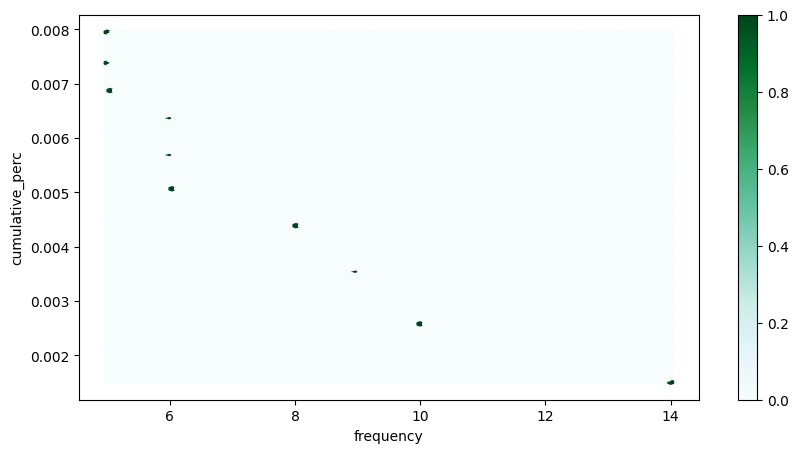

In [87]:
#Realizamos grafico hexagonal del dataframe filtrado, alternativo al scatter plot
Filtro_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

In [176]:
#Porto
table20=freq_tbl(Datos_limpios_Porto['minimum_nights'].astype(str))
table20
filtro20=table20[table2['frequency']>100]
filtro20
filtro_index0=filtro20.set_index('minimum_nights')
filtro_index0
filtro_index_frequency0=filtro_index0.drop(['percentage','cumulative_perc'],axis=1)
filtro_index_frequency0

/var/folders/19/7c2smbhs6b3g5ffy1ph3r__m0000gn/T/ipykernel_547/4265986150.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtro20=table20[table2['frequency']>100]


,frequency
minimum_nights,
2.0,5695
1.0,5404
3.0,2039
4.0,292
5.0,255


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

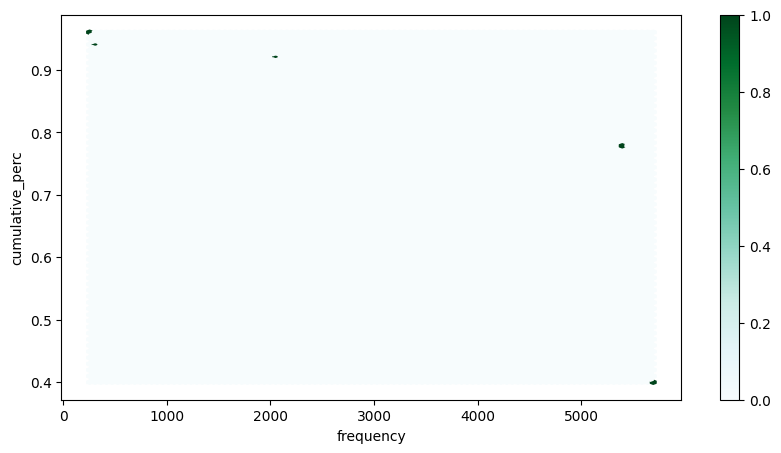

In [178]:
#Realizamos grafico hexagonal del dataframe filtrado, alternativo al scatter plot
filtro_index0.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

Number of Reviews

In [93]:
#Amsterdam 
table2=freq_tbl(DLA['number_of_reviews'].astype(str))
table2
filtro2=table2[table2['frequency']>200]
filtro2
filtro_index=filtro2.set_index('number_of_reviews')
filtro_index
filtro_index_frequency=filtro_index.drop(['percentage','cumulative_perc'],axis=1)
filtro_index_frequency

,frequency
number_of_reviews,
0.0,992
1.0,585
3.0,495
2.0,485
4.0,447
5.0,387
6.0,359
8.0,318
7.0,313


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

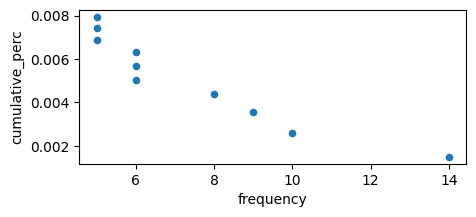

In [100]:
#Realizamos grafico de dispersión del dataframe filtrado
Filtro_index.plot("frequency", "cumulative_perc", kind="scatter", figsize=(5,2))

In [102]:
#Porto
table2=freq_tbl(Datos_limpios_Porto['number_of_reviews'].astype(str))
table2
filtro2=table2[table2['frequency']>200]
filtro2
filtro_indexp=filtro2.set_index('number_of_reviews')
filtro_indexp
filtro_index_frequencyp=filtro_index.drop(['percentage','cumulative_perc'],axis=1)
filtro_index_frequencyp

,frequency
number_of_reviews,
0.0,1699
1.0,777
2.0,618
3.0,477
4.0,413
5.0,340
50.6,314
6.0,295
7.0,283


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

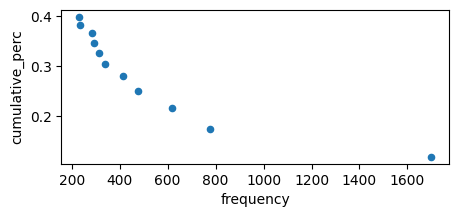

In [104]:
#Realizamos grafico de dispersión del dataframe filtrado
filtro_indexp.plot("frequency", "cumulative_perc", kind="scatter", figsize=(5,2))

Calculated host listed count

In [108]:
#Amsterdam
table2=freq_tbl(DLA['calculated_host_listings_count'].astype(str))
table2
filtro2=table2[table2['frequency']>100]
filtro2
filtro_index=filtro2.set_index('calculated_host_listings_count')
filtro_index
filtro_index_frequency=filtro_index.drop(['percentage','cumulative_perc'],axis=1)
filtro_index_frequency

,frequency
calculated_host_listings_count,
1.0,7591
2.0,706
3.0,249
1.4,194
4.0,140
6.0,120
5.0,105


Text(0, 0.5, 'Frecuencia')

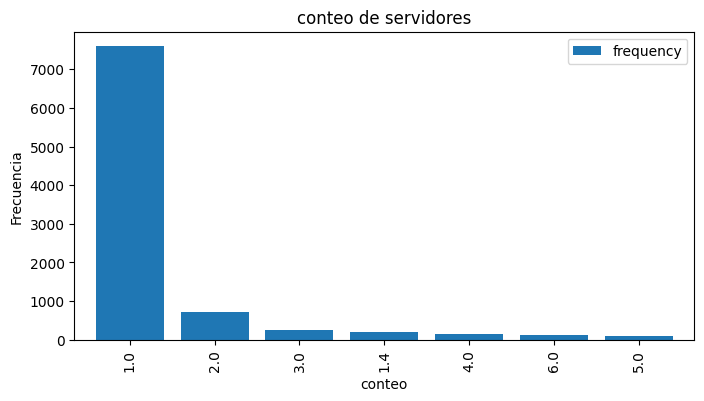

In [107]:
#Realizamos grafico de barras del dataframe filtrado
filtro_index_frequency.plot(kind = 'bar', width=0.8, figsize=(8,4))
plt.title('conteo de servidores')
plt.xlabel('conteo')
plt.ylabel('Frecuencia')

In [113]:
#Porto
table2=freq_tbl(Datos_limpios_Porto['calculated_host_listings_count'].astype(str))
table2
filtro2=table2[table2['frequency']>200]
filtro2
filtro_index=filtro2.set_index('calculated_host_listings_count')
filtro_index
filtro_index_frequencyp=filtro_index.drop(['percentage','cumulative_perc'],axis=1)
filtro_index_frequencyp

,frequency
calculated_host_listings_count,
1.0,3437
2.0,1440
3.0,1047
4.0,932
5.0,800
6.0,582
7.0,560
8.0,448
9.0,405


Text(0, 0.5, 'Frecuencia')

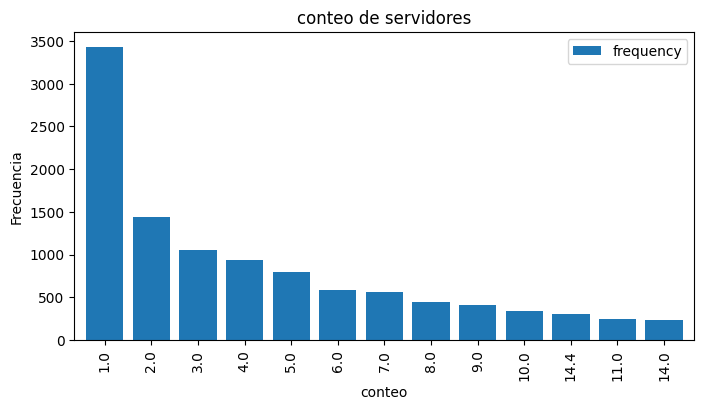

In [114]:
#Realizamos grafico de barras del dataframe filtrado
filtro_index_frequencyp.plot(kind = 'bar', width=0.8, figsize=(8,4))
plt.title('conteo de servidores')
plt.xlabel('conteo')
plt.ylabel('Frecuencia')

Number of reviews

In [115]:
#Amsterdam
table2=freq_tbl(DLA['availability_365'].astype(str))
table2
filtro2=table2[table2['frequency']>100]
filtro2
filtro_index=filtro2.set_index('availability_365')
filtro_index
filtro_index_frequency=filtro_index.drop(['percentage','cumulative_perc'],axis=1)
filtro_index_frequency

,frequency
availability_365,
0,2938
3,111
2,108
7,104
5,104
4,102


Text(0, 0.5, 'Frecuencia')

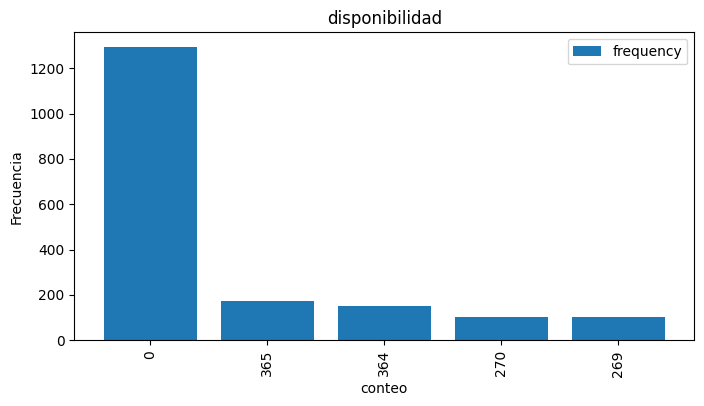

In [179]:
#Realizamos grafico de barras del dataframe filtrado
filtro_index_frequency.plot(kind = 'bar', width=0.8, figsize=(8,4))
plt.title('disponibilidad')
plt.xlabel('conteo')
plt.ylabel('Frecuencia')

In [180]:
#Porto
table2=freq_tbl(Datos_limpios_Porto['availability_365'].astype(str))
table2
filtro2=table2[table2['frequency']>100]
filtro2
filtro_index=filtro2.set_index('availability_365')
filtro_index
filtro_index_frequencyp=filtro_index.drop(['percentage','cumulative_perc'],axis=1)
filtro_index_frequencyp

,frequency
availability_365,
0,1294
365,172
364,149
270,103
269,103


Text(0, 0.5, 'Frecuencia')

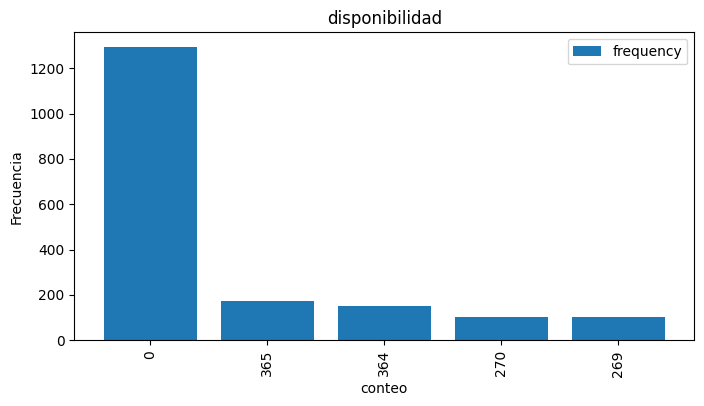

In [181]:
#Realizamos grafico de barras del dataframe filtrado
filtro_index_frequencyp.plot(kind = 'bar', width=0.8, figsize=(8,4))
plt.title('disponibilidad')
plt.xlabel('conteo')
plt.ylabel('Frecuencia')

Host ID

In [121]:
table9=freq_tbl(Datos_limpios_Porto['host_id'].astype(str))
table9
filtro9=table9[table9['frequency']>90]
filtro9
filtro_index9=filtro9.set_index('host_id')
filtro_index9
filtro_index_frequency9=filtro_index9.drop(['percentage','cumulative_perc'],axis=1)
filtro_index_frequency9


,frequency
host_id,
12730028,307
364783572,145
30907275,114
2228036,102
16922131,92


<Axes: ylabel='frequency'>

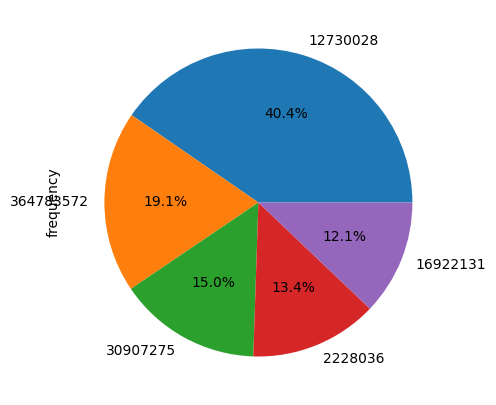

In [122]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index_frequency9["frequency"].plot(kind='pie', figsize=(10,5), autopct="%0.1f%%")

In [174]:
table9=freq_tbl(DLA['host_id'].astype(str))
table9
filtro9=table9[table9['frequency']>90]
filtro9
filtro_index01=filtro9.set_index('host_id')
filtro_index01
filtro_index_frequency9=filtro_index9.drop(['percentage','cumulative_perc'],axis=1)
filtro_index_frequency9


,frequency
host_id,
12730028,307
364783572,145
30907275,114
2228036,102
16922131,92


<Axes: ylabel='frequency'>

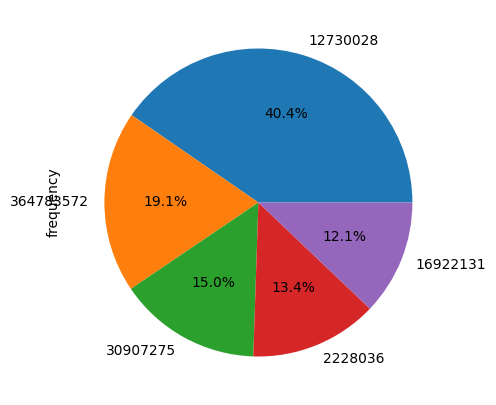

In [175]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index01["frequency"].plot(kind='pie', figsize=(10,5), autopct="%0.1f%%")

Host Name

In [145]:
#porto
table10=freq_tbl(Datos_limpios_Porto['host_name'].astype(str))
table10
filtro10=table10[table10['frequency']>150]
filtro10
filtro_index10=filtro10.set_index('host_name')
filtro_index10
filtro_index_frequency10=filtro_index10.drop(['percentage','cumulative_perc'],axis=1)
filtro_index_frequency10

,frequency
host_name,
GuestReady,414
Host Wise,307
Rui,291
Pedro,250
Maria,228
Ana,168


<Axes: xlabel='host_name'>

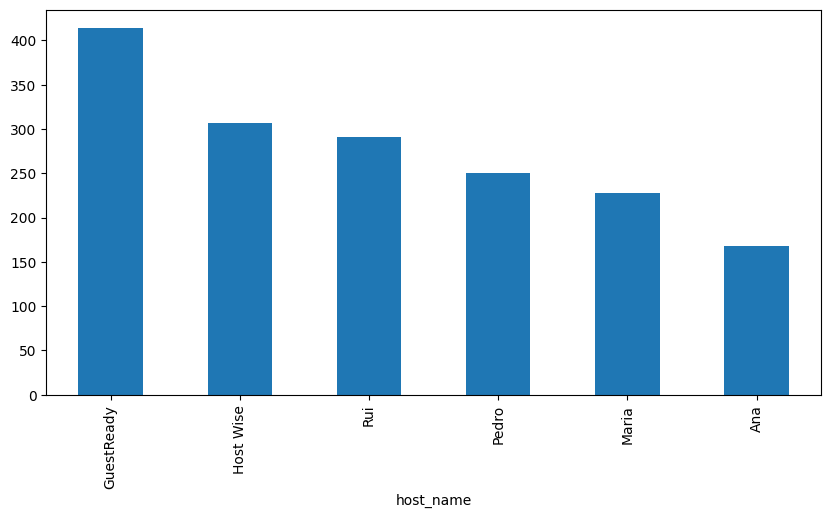

In [146]:
filtro_index_frequency10["frequency"].plot(kind='bar', figsize=(10,5))

In [142]:
#Amsterdam
table11=freq_tbl(DLA['host_name'].astype(str))
table11
filtro11=table11[table11['frequency']>40]
filtro11
filtro_index11=filtro11.set_index('host_name')
filtro_index11
filtro_index_frequency11=filtro_index11.drop(['percentage','cumulative_perc'],axis=1)
filtro_index_frequency11

,frequency
host_name,
Maarten,46
Laura,46
David,46
Thomas,45
Peter,45


<Axes: xlabel='host_name'>

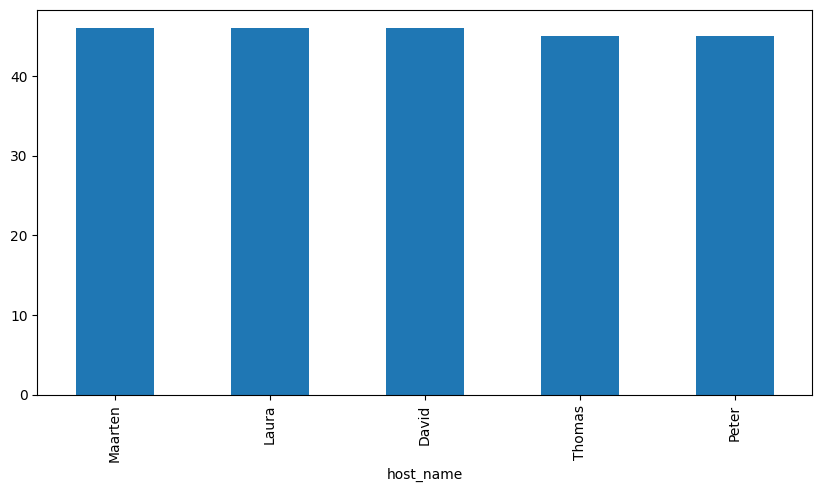

In [143]:
filtro_index_frequency11["frequency"].plot(kind='bar', figsize=(10,5))

neighbourhood

In [149]:
#Porto
table11=freq_tbl(Datos_limpios_Porto['neighbourhood'].astype(str))
table11
filtro11=table11[table11['frequency']>400]
filtro11
filtro_index11=filtro11.set_index('neighbourhood')
filtro_index11
filtro_index_frequency11=filtro_index11.drop(['percentage','cumulative_perc'],axis=1)
filtro_index_frequency11

,frequency
neighbourhood,
"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, Vitória",7202
Bonfim,1445
Santa Marinha e São Pedro da Afurada,711
Paranhos,572
Lordelo do Ouro e Massarelos,560
Matosinhos e Leça da Palmeira,401


<Axes: ylabel='frequency'>

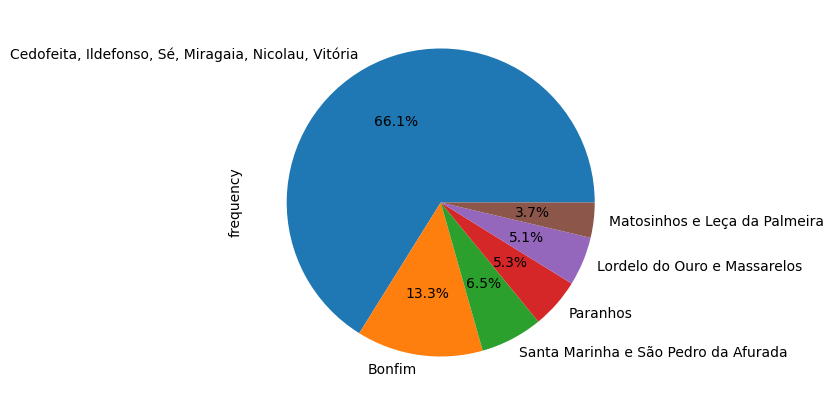

In [150]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index_frequency11["frequency"].plot(kind='pie', figsize=(10,5), autopct="%0.1f%%")

In [154]:
#Amsterdam
table11=freq_tbl(DLA['neighbourhood'].astype(str))
table11
filtro11=table11[table11['frequency']>650]
filtro11
filtro_index11=filtro11.set_index('neighbourhood')
filtro_index11
filtro_index_frequency12=filtro_index11.drop(['percentage','cumulative_perc'],axis=1)
filtro_index_frequency12

,frequency
neighbourhood,
De Baarsjes - Oud-West,1587
De Pijp - Rivierenbuurt,1071
Centrum-West,1025
Centrum-Oost,833
Westerpark,658


<Axes: ylabel='frequency'>

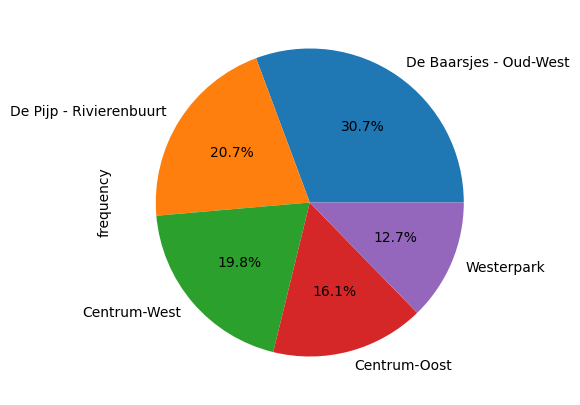

In [155]:
#Realizamos grafico de pastel del dataframe filtrado
filtro_index_frequency12["frequency"].plot(kind='pie', figsize=(10,5), autopct="%0.1f%%")